<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/multivariable_linear_regression_withoutSK_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the libraries and data
df = pd.read_csv("/content/car driving risk analysis.csv")
df

,speed,car_age,experience,risk
0,200,15,5.0,85
1,90,17,13.0,20
2,165,12,4.0,93
3,110,20,NaN,60
4,140,5,3.0,82
5,115,2,8.0,10


In [3]:
exp_fit = df.experience.median()
exp_fit

5.0

In [4]:
df.experience = df.experience.fillna(exp_fit)
df.experience

0     5.0
1    13.0
2     4.0
3     5.0
4     3.0
5     8.0
Name: experience, dtype: float64

In [5]:
# Normalize the data
df = (df - df.mean())/df.std()
df.head()

,speed,car_age,experience,risk
0,1.565497,0.450698,-0.363336,0.752364
1,-1.153524,0.735349,1.816681,-1.081523
2,0.700354,0.023721,-0.635838,0.978073
3,-0.659157,1.162326,-0.363336,0.047023
4,0.082395,-0.972558,-0.908341,0.667723


In [6]:
# Create matrices and set hyperparameters
X = df.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = df.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])

#set hyper parameters
alpha = 0.01
iters = 1000

In [7]:
#Create the cost function
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [8]:
#Create the Gradient Descent function
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[ 2.49800181e-16 -6.30009659e-01  1.68439151e-01]]
0.23545139465961862


Text(0.5, 1.0, 'Error vs. Training Epoch')

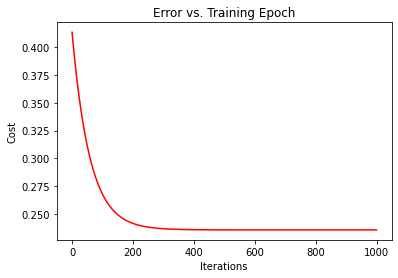

In [9]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')